In [1]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Consistent plot size
from pylab import rcParams
rcParams['figure.figsize'] = (16,8)

# handle unwanted warnings
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# time series related imports
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima


In [2]:
# Read in data and display fist 5 rows
df = pd.read_csv('TIME SERIES + TOPIC AND SENTIMENT INTENSITY - DATA COMPOSITION 1 (70-15-15).csv', index_col="Month", parse_dates=True)
df.head()

,Tourist Arrival,NegativityQDAP,PositivityQDAP,TOPIC 1,TOPIC 2,TOPIC 3,TOPIC 4,TOPIC 5,TOPIC 6,TOPIC 7,TOPIC 8,TOPIC 9,TOPIC 10,Class
Month,,,,,,,,,,,,,,
2008-01-01,399556,0.181818,0.090909,0.008715,0.010894,0.889993,0.011228,0.010641,0.001710,0.014932,0.027566,0.014081,0.010241,Train
2008-01-02,411032,0.000000,0.090909,0.009085,0.010974,0.007221,0.006829,0.006410,0.005451,0.011673,0.014948,0.913561,0.013848,Train
2008-01-03,414332,0.142857,0.000000,0.008164,0.005849,0.006917,0.009097,0.007196,0.001611,0.007281,0.005533,0.014198,0.934153,Train
2008-01-04,395900,0.214286,0.071429,0.007528,0.013789,0.005867,0.911020,0.012191,0.001259,0.014063,0.019446,0.006807,0.008030,Train
2008-01-05,366387,0.000000,0.100000,0.008862,0.007257,0.010529,0.011619,0.014288,0.001458,0.015968,0.915464,0.010944,0.003609,Train


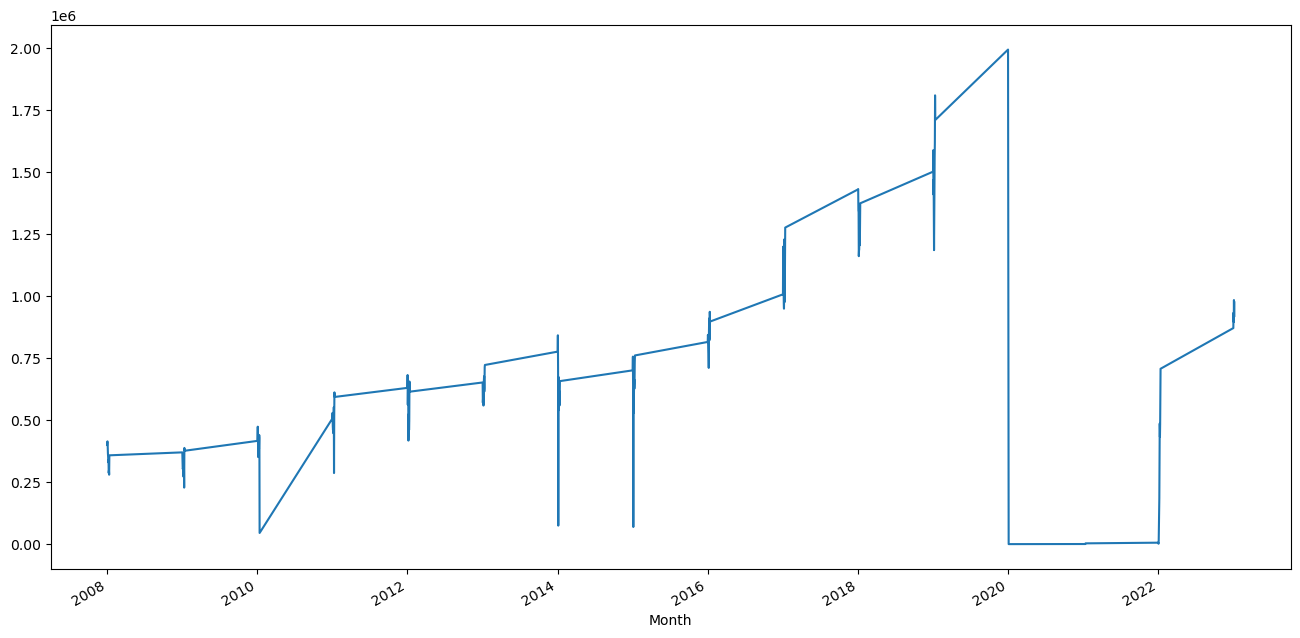

In [3]:
fig, ax = plt.subplots(figsize=(16,8))
ax = df['Tourist Arrival'].plot()
color_arr = ['g', 'r', 'm', 'b', 'y', 'k']
c_indx = 0
for x in df[df['Tourist Arrival']==1].index:
    ax.axvline(x=x, color=color_arr[c_indx], linewidth=0.5)
    if color_arr[c_indx] == 'k':
        c_indx = 0
    else:
        c_indx +=1

In [4]:
df1=df.drop(["Class"], axis=1)
print(df1)

            Tourist Arrival  NegativityQDAP  PositivityQDAP   TOPIC 1  \
Month                                                                   
2008-01-01           399556        0.181818        0.090909  0.008715   
2008-01-02           411032        0.000000        0.090909  0.009085   
2008-01-03           414332        0.142857        0.000000  0.008164   
2008-01-04           395900        0.214286        0.071429  0.007528   
2008-01-05           366387        0.000000        0.100000  0.008862   
...                     ...             ...             ...       ...   
2023-01-02           932969        0.000000        0.181818  0.014135   
2023-01-03           895425        0.000000        0.142857  0.007677   
2023-01-04           984146        0.000000        0.222222  0.014135   
2023-01-05           916257        0.000000        0.125000  0.014135   
2023-01-06           975010        0.000000        0.111111  0.012180   

             TOPIC 2   TOPIC 3   TOPIC 4   TOPIC 5

In [5]:
auto_arima(df1['Tourist Arrival'], m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4947.042, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4937.754, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4938.437, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4945.121, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4948.808, Time=0.02 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=4939.754, Time=0.14 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=4939.754, Time=0.11 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=4938.184, Time=0.05 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=4940.975, Time=0.26 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=4935.707, Time=0.04 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=4937.707, Time=0.10 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=4937.707, Time=0.10 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=4936.131, Time=0.04 sec
 ARIMA(0,1,0)(2,0,1)[12]

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [6]:
train = df1['Tourist Arrival'][:'01/02/2019'].dropna()
test = df1['Tourist Arrival']['01/03/2019':].dropna()
exog_train = df1.drop(['Tourist Arrival'], axis=1)[:'01/02/2019'].dropna()
exog_test = df1.drop(['Tourist Arrival'], axis=1)['01/03/2019':].dropna()

In [7]:
import statsmodels.api as sm
model = SARIMAX(train,order=(0,1,0),seasonal_order=(1,0,0,12),exog = exog_train,
                                enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()
results.summary()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18705D+01    |proj g|=  4.94378D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14      0      1      0     0     0   4.944D-06   1.187D+01
  F =   11.870515430222687     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                    Tourist Arrival   No. Observations:                  134
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 12)   Log Likelihood               -1590.649
Date:                            Wed, 23 Aug 2023   AIC                           3209.298
Time:                                    20:15:57   BIC                           3248.439
Sample:                                         0   HQIC                          3225.195
                                            - 134                                         
Covariance Type:                              opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
NegativityQDAP  1.754e+05   1.32e+05      1.330      0.183    -8.3e+04    4.34e+05
PositivityQDAP  1.822e+05    1.2e+05      1.512      0.131    -5.4e+04    4.18e+05
TOPIC 1        -1.175e+05    1.2e+05     -0.981      0.326   -3.52e+05    1.17e+05
TOPIC 2        -2.054e+05    5.5e+04     -3.731      0.000   -3.13e+05   -9.75e+04
TOPIC 3        -2.073e+04   6.34e+04     -0.327      0.743   -1.45e+05    1.03e+05
TOPIC 4        -1.101e+05   4.33e+04     -2.546      0.011   -1.95e+05   -2.54e+04
TOPIC 5         -6.27e+04   5.78e+04     -1.084      0.278   -1.76e+05    5.07e+04
TOPIC 6        -9.863e+04   1.17e+05     -0.843      0.399   -3.28e+05    1.31e+05
TOPIC 7        -8.073e+04   4.02e+04     -2.008      0.045    -1.6e+05   -1943.600
TOPIC 8        -7.078e+04   5.43e+04     -1.303      0.193   -1.77e+05    3.57e+04
TOPIC 9        -1.278e+05    3.4e+04     -3.762      0.000   -1.94e+05   -6.12e+04
TOPIC 10       -8.325e+04   8.63e+04     -0.965      0.335   -2.52e+05    8.58e+04
ar.S.L12           0.3261      0.096      3.409      0.001       0.139       0.514
sigma2          1.534e+10      2.422   6.34e+09      0.000    1.53e+10    1.53e+10
===================================================================================
Ljung-Box (L1) (Q):                  12.81   Jarque-Bera (JB):               140.92
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.58   Skew:                            -0.13
Prob(H) (two-sided):                  0.09   Kurtosis:                         8.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.73e+33. Standard errors may be unstable.
"""

In [8]:
start = len(train)
end = len(train) + len(test) - 1
y_pred = results.predict(start=start,end=end, exog = exog_test, dynamic=False).rename('SARIMA(0,1,0)(1,0,[0],12) Predictions')

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [9]:
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error

In [10]:
RMSE = np.sqrt(mean_squared_error(test, y_pred))
print("Root Mean Squared Error:", RMSE)

Root Mean Squared Error: 1278367.0245472866


In [11]:
MAE = mean_absolute_error(test, y_pred)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 1125476.3703547453


In [12]:
MAPE = mean_absolute_percentage_error(test, y_pred)
print("Mean Absolute Percentage Error:", MAPE)

Mean Absolute Percentage Error: 2.6992880207397215e+21


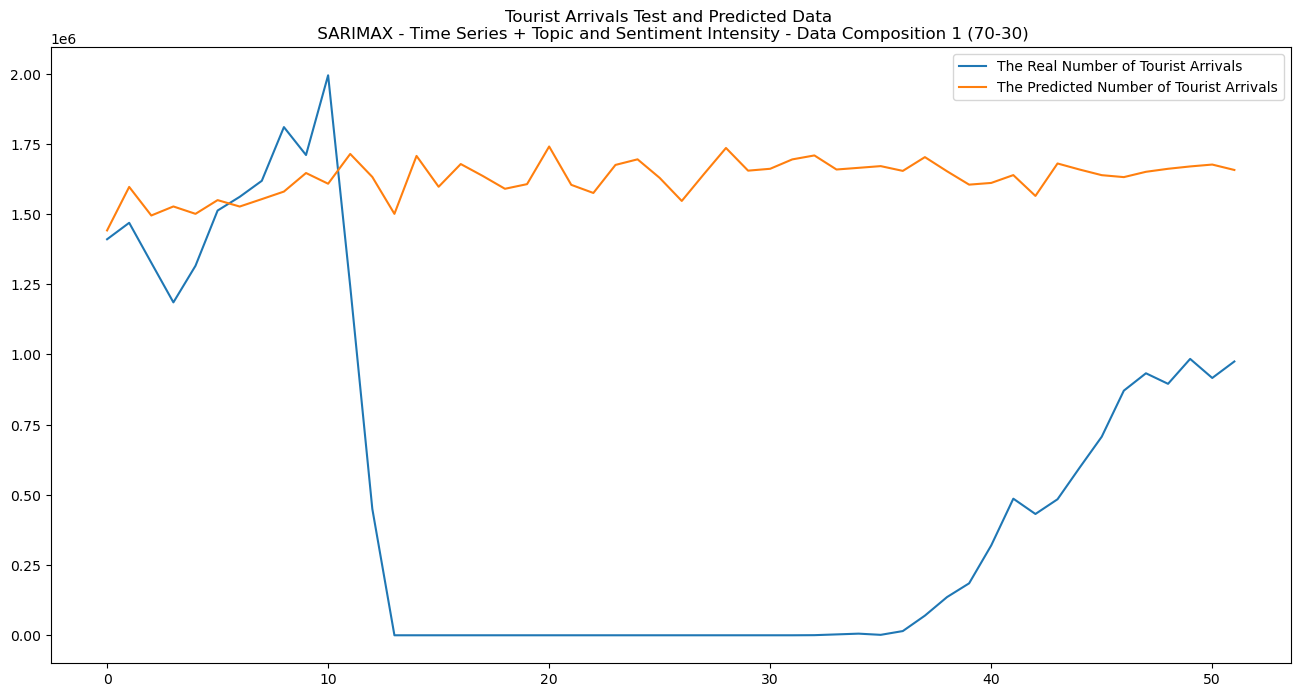

In [14]:
x_ax = range(len(test))
plt.plot(x_ax, test, label="The Real Number of Tourist Arrivals")
plt.plot(x_ax, y_pred, label="The Predicted Number of Tourist Arrivals")
plt.title("Tourist Arrivals Test and Predicted Data \n SARIMAX - Time Series + Topic and Sentiment Intensity - Data Composition 1 (70-30)")
plt.legend()
plt.show()